In [10]:
import numpy as np
import matplotlib.pyplot as plt
import autoalign_hist_analysis

In [43]:
save_path="autoalign_hist_data"
fname_dout = "autoalign_hist_20220919_143431.npy" # disks out
fname_din = 'autoalign_hist_20220916_171219.npy' # disks in

init_poss_o, aligned_poss_o, aligned_freqs_o, aligned_freqs_err_o = autoalign_hist_analysis.load_data(save_path,fname_dout, keep_fails=False)
init_poss_i, aligned_poss_i, aligned_freqs_i, aligned_freqs_err_i = autoalign_hist_analysis.load_data(save_path,fname_din, keep_fails=False)

init_poss_o = init_poss_o.reshape(-1,6)
init_poss_i = init_poss_i.reshape(-1,6)

coords = ['X', 'Y', 'Z', 'U', 'V', 'W']
coords_noZ = ['X', 'Y', 'U', 'V', 'W']

loaded file with 100 aligns
loaded file with 100 aligns
Some (3) aligns failed, here: [ 0 50 98]


In [31]:
def plotCoordScatter(init_poss, aligned_poss, ind=None):
    coords = ['X', 'Y', 'Z', 'U', 'V', 'W']
    n = np.arange(init_poss.shape[0])
    f = plt.figure(figsize=(9,6))
    for i,coord in enumerate(coords):
        plt.subplot(231+i)
        plt.scatter(init_poss[:,i], aligned_poss[:,i], c=n)
        if ind is not None:
            plt.scatter(init_poss[ind,i], aligned_poss[ind,i], c='red')
        plt.title(f"Alignment Scatter in {coord}")
        plt.ylabel("Aligned Position (hexa coords)")
        plt.xlabel("Initial Position (hexa coords)")
    plt.tight_layout()

# Comparing Aligned Frequency

-344816.7711400986


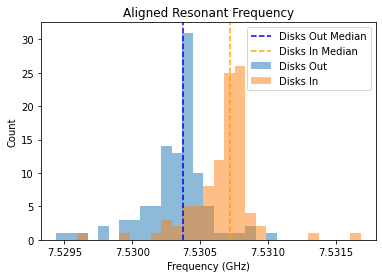

In [12]:
bins = np.linspace(7.52944,7.53168,30)
plt.hist(aligned_freqs_o*1e-9, bins=bins, alpha=0.5, label="Disks Out")
plt.hist(aligned_freqs_i*1e-9, bins=bins, alpha=0.5, label="Disks In")
plt.axvline(np.median(aligned_freqs_o*1e-9), c='b', ls='--', label="Disks Out Median")
plt.axvline(np.median(aligned_freqs_i*1e-9), c='orange', ls='--', label="Disks In Median")
plt.title("Aligned Resonant Frequency")
plt.ylabel("Count")
plt.xlabel("Frequency (GHz)")
plt.legend()

print(np.median(aligned_freqs_o)-np.median(aligned_freqs_i))

# Disks Out

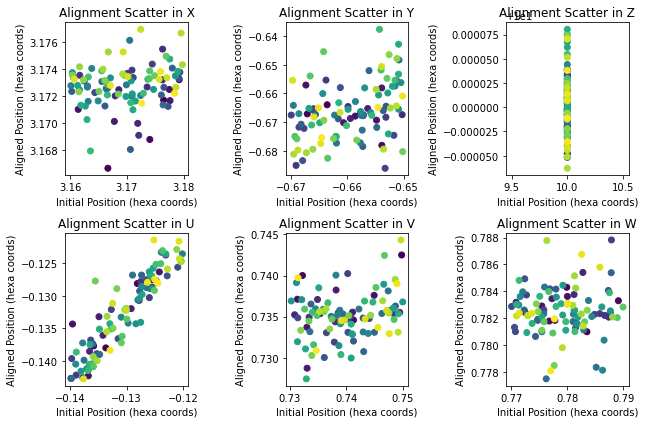

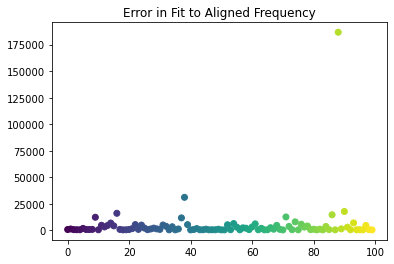

In [35]:
plotCoordScatter(init_poss_o, aligned_poss_o)
plt.figure()
n = np.arange(init_poss_o.shape[0])
plt.scatter(n, aligned_freqs_err_o, c=n)
#plt.scatter(n[ind], aligned_freqs_err_o[ind], c='red')
plt.title("Error in Fit to Aligned Frequency")
plt.show()

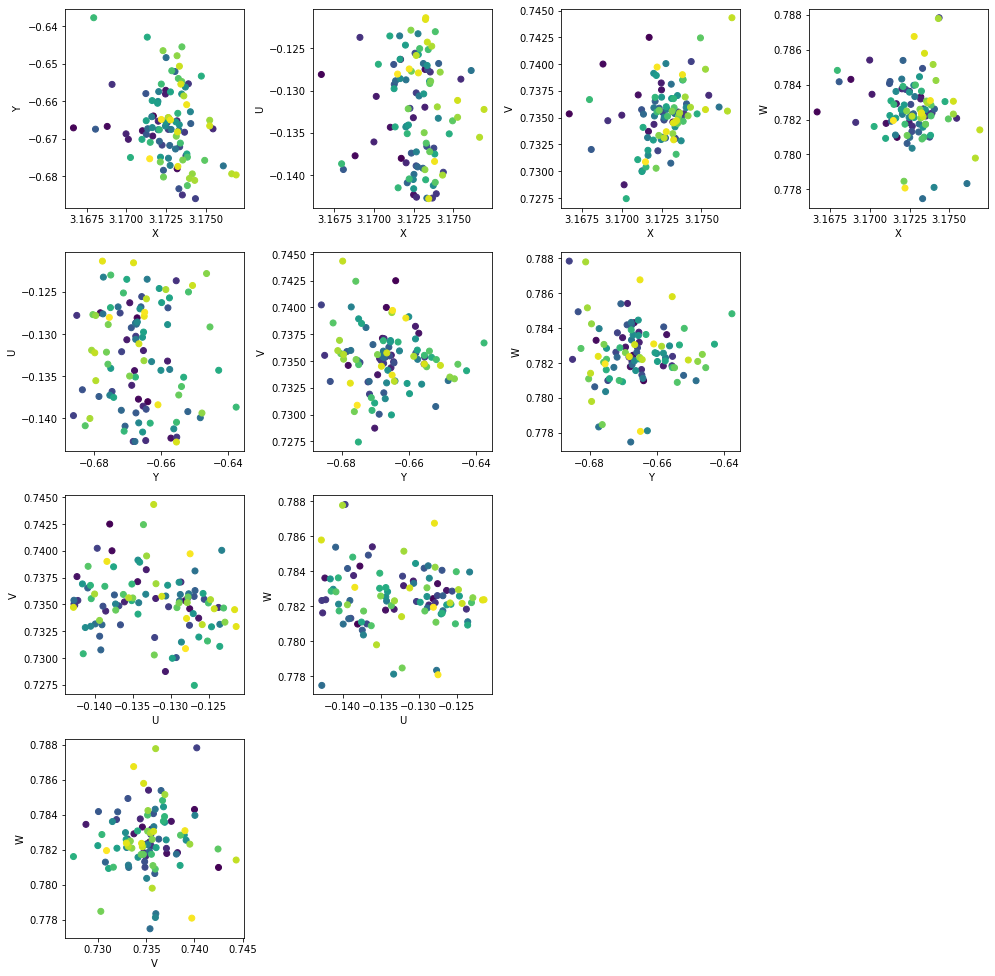

In [66]:
# cross corr between aligned coords (except Z obviously)
n = np.arange(init_poss_o.shape[0])
plt.figure(figsize=(20,20))
for i in range(5):
    for j in range(5):
        if i >= j:
            continue
        if i >= 2:
            ind = i + 1
        else:
            ind = i
        if j >= 2:
            jnd = j + 1
        else:
            jnd = j
        # janky I know. Need to skip Z
        plt.subplot(6,6,1+5*i+j)
        plt.scatter(aligned_poss_o[:,ind], aligned_poss_o[:,jnd], c=n)
        plt.xlabel(coords[ind])
        plt.ylabel(coords[jnd])
plt.tight_layout()

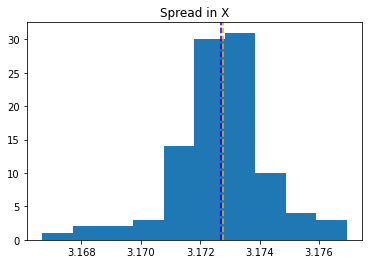

Mean: 3.1726862838338707
Median: 3.172777021165
Stdev: 0.0016284797123321954


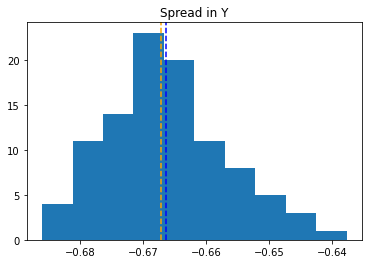

Mean: -0.6663177502637382
Median: -0.66709227206575
Stdev: 0.009710167034190325


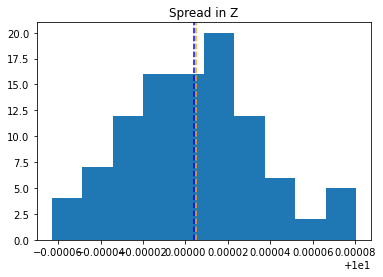

Mean: 10.00000406213721
Median: 10.000004901295
Stdev: 3.036015675991673e-05


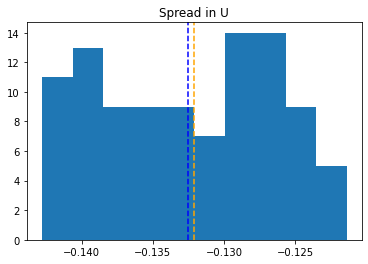

Mean: -0.13253287017620802
Median: -0.13213445815015
Stdev: 0.006088263656001075


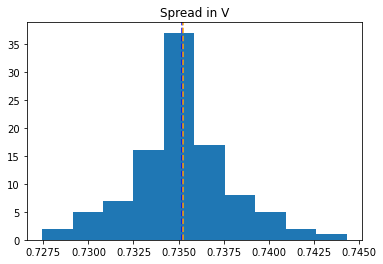

Mean: 0.7351963851329689
Median: 0.7352745877722999
Stdev: 0.0028429613179728665


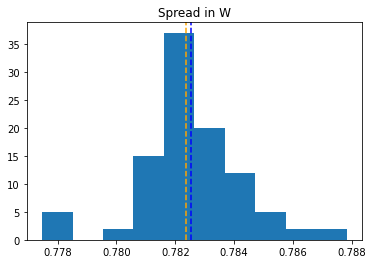

Mean: 0.7825371710075489
Median: 0.7823726748605999
Stdev: 0.0017507155779343997


In [67]:
# spread in each coord
for i in range(6):
    plt.figure()
    plt.hist(aligned_poss_o[:,i])
    plt.axvline(np.mean(aligned_poss_o[:,i]), c='b', ls='--', label="Mean")
    plt.axvline(np.median(aligned_poss_o[:,i]), c='orange', ls='--', label="Median")
    plt.title(f"Spread in {coords[i]}")
    plt.show()
    print(f"Mean: {np.mean(aligned_poss_o[:,i])}\nMedian: {np.median(aligned_poss_o[:,i])}\nStdev: {np.std(aligned_poss_o[:,i])}")


# Disks In

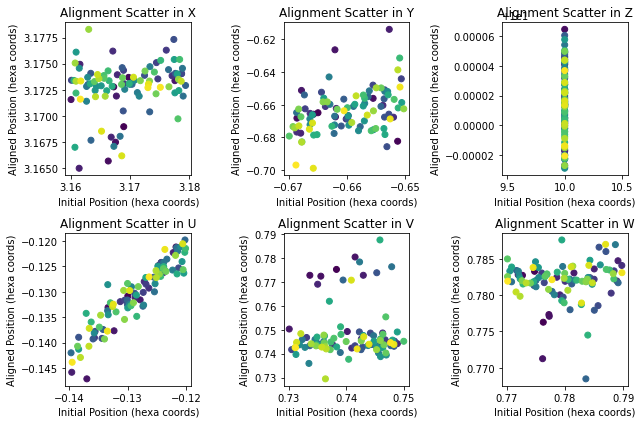

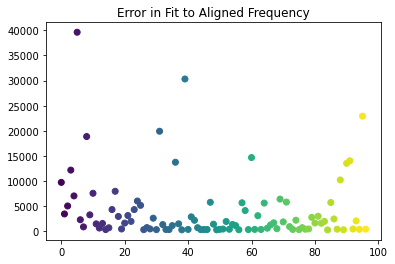

In [37]:
plotCoordScatter(init_poss_i, aligned_poss_i)
plt.figure()
n = np.arange(init_poss_i.shape[0])
plt.scatter(n, aligned_freqs_err_i, c=n)
#plt.scatter(n[ind], aligned_freqs_err_o[ind], c='red')
plt.title("Error in Fit to Aligned Frequency")
plt.show()

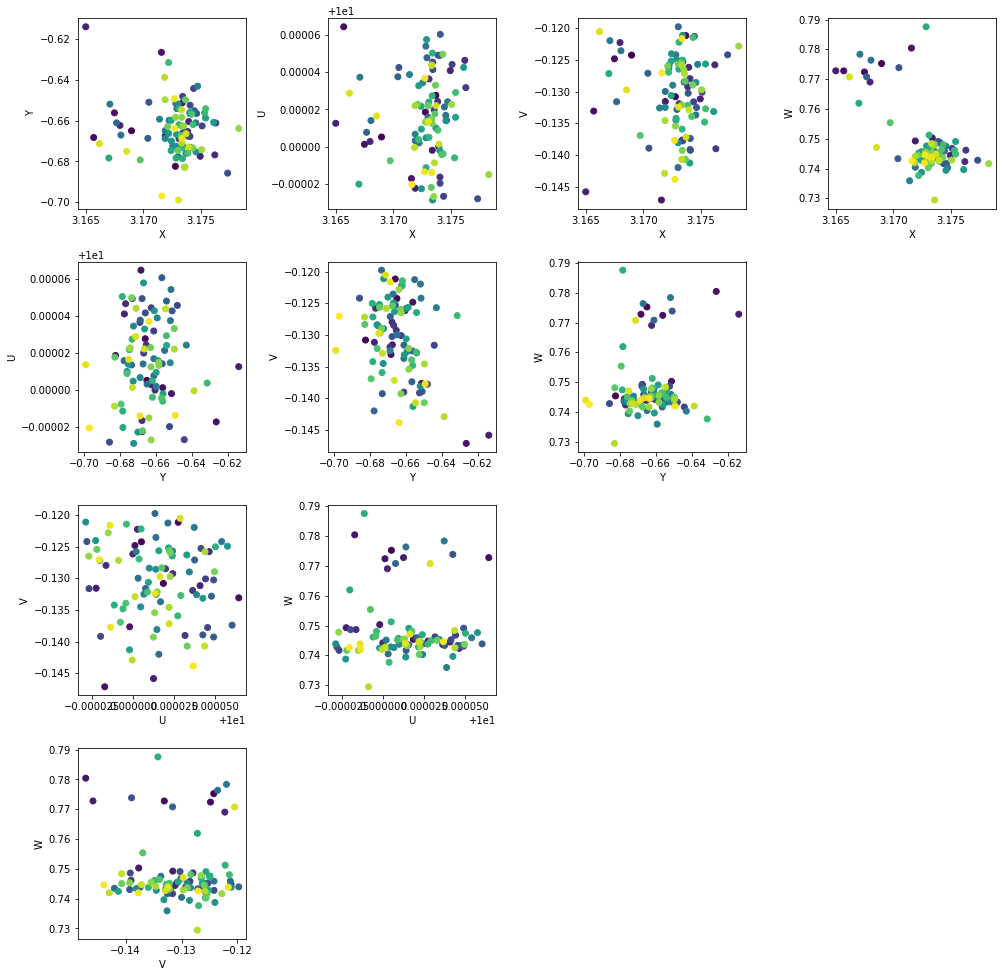

In [55]:
# cross corr between aligned coords (except Z obviously)
n = np.arange(init_poss_i.shape[0])
plt.figure(figsize=(20,20))
for i in range(5):
    for j in range(5):
        if i >= j:
            continue
        plt.subplot(6,6,1+5*i+j)
        plt.scatter(aligned_poss_i[:,i], aligned_poss_i[:,j], c=n)
        plt.xlabel(coords_noZ[i])
        plt.ylabel(coords_noZ[j])
plt.tight_layout()